<a href="https://colab.research.google.com/github/AWO112233/Data-Merging-for-3300-data/blob/main/MaywoodsHD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
final_HD_df = pd.read_csv('final_HD_df.csv')

In [ ]:
metadata_cols = ['BookableUnit_Name', 'Building_Name', 'District_Title','Equipment_Title', 'BookableUnit_Capacity','BookableUnitType_Title', 'Active_Months', 'Total_Bookings']
MR_metadata =final_HD_df[metadata_cols]

In [ ]:
pd.reset_option('display.max_rows')

In [ ]:
MR = final_HD_df.drop(columns= metadata_cols)

KMEANS CLUSTERING TO CLUSTER BOOKABLE (Hot Desk)UNITS BASED ON TREND

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
MR_scaled = scaler.fit_transform(MR)


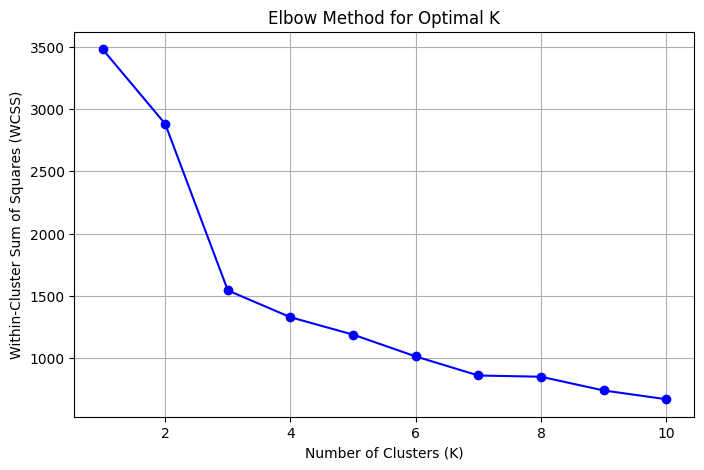

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(MR_scaled)
    wcss.append(kmeans.inertia_)

# Plot WCSS to find the elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [ ]:
# 6. Fit final KMeans with optimal K
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(MR_scaled)

In [ ]:
# 7. Create final DataFrame with cluster labels
HD_clustered_df = MR_metadata.copy()
HD_clustered_df['Cluster'] = cluster_labels

In [ ]:
HD_clustered_df.head()

,BookableUnit_Name,Building_Name,District_Title,Equipment_Title,BookableUnit_Capacity,BookableUnitType_Title,Active_Months,Total_Bookings,Cluster
0,Qpw Kvac 1-19,Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4,Y hkgzlkh-3,NaN,1.0,Hot Desk,1,1,0
1,Sppt 324 Kvac 1-338,Raoxqgobq Pjirambx-19,Hnfpuyplq-4,NaN,1.0,Hot Desk,9,26,0
2,Sppt 320 Kvac 09-341,Raoxqgobq Pjirambx-19,Hnfpuyplq-4,NaN,1.0,Hot Desk,1,4,0
3,Sppt 324 Kvac 4-332,Raoxqgobq Pjirambx-19,Hnfpuyplq-4,NaN,1.0,Hot Desk,8,23,0
4,Sppt 320 Kvac 08-340,Raoxqgobq Pjirambx-19,Hnfpuyplq-4,NaN,1.0,Hot Desk,1,2,0


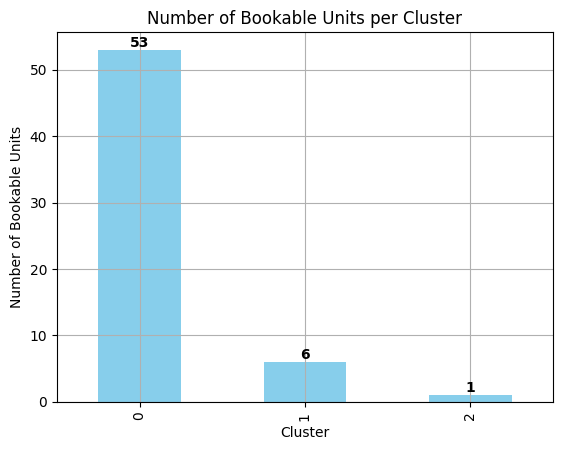

In [ ]:
# 9. Visualize cluster size with counts on bars
ax = HD_clustered_df['Cluster'].value_counts().sort_index().plot(
    kind='bar', color='skyblue'
)
plt.xlabel('Cluster')
plt.ylabel('Number of Bookable Units')
plt.title('Number of Bookable Units per Cluster')
plt.grid(True)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),               # Count value
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.show()


In [ ]:
cluster0 = HD_clustered_df[HD_clustered_df['Cluster'] == 0]
cluster1 = HD_clustered_df[HD_clustered_df['Cluster'] == 1]
cluster2 = HD_clustered_df[HD_clustered_df['Cluster'] == 2]

In [ ]:
cluster1.head()

,BookableUnit_Name,Building_Name,District_Title,Equipment_Title,BookableUnit_Capacity,BookableUnitType_Title,Active_Months,Total_Bookings,Cluster
19,Sppt 330 Kvac 3-522,Raoxqgobq Pjirambx-19,Hnfpuyplq-4,NaN,1.0,Hot Desk,33,141,1
30,Sppt 330 Kvac 1-520,Raoxqgobq Pjirambx-19,Hnfpuyplq-4,NaN,1.0,Hot Desk,30,87,1
38,Sppt 302 Kvac 01-549,Raoxqgobq Pjirambx-19,Hnfpuyplq-4,NaN,1.0,Hot Desk,22,117,1
39,L045 Kvac 7 (hvacwpq eptqywvi)-569,NZG Fgo Vbxoi Xpam-11,Dnlqpgqnlp & Zygflpph-6,NaN,1.0,Hot Desk,19,88,1
40,L045 Kvac 6 (hvacwpq eptqywvi)-568,NZG Fgo Vbxoi Xpam-11,Dnlqpgqnlp & Zygflpph-6,NaN,1.0,Hot Desk,22,119,1


In [ ]:
min_maxC0 = cluster0['Total_Bookings'].agg(['min', 'max'])
print(min_maxC0)

min     1
max    63
Name: Total_Bookings, dtype: int64


In [ ]:
min_maxCc0 = cluster0['Active_Months'].agg(['min', 'max'])
print(min_maxCc0)

min     1
max    23
Name: Active_Months, dtype: int64


In [ ]:
min_maxC1 = cluster1['Total_Bookings'].agg(['min', 'max'])
print(min_maxC1)

min     87
max    141
Name: Total_Bookings, dtype: int64


In [ ]:
min_maxCc1 = cluster1['Active_Months'].agg(['min', 'max'])
print(min_maxCc1)

min    19
max    33
Name: Active_Months, dtype: int64


In [ ]:
min_maxC2 = cluster2['Total_Bookings'].agg(['min', 'max'])
print(min_maxC2)

min    398
max    398
Name: Total_Bookings, dtype: int64


In [ ]:
min_maxCc2 = cluster2['Active_Months'].agg(['min', 'max'])
print(min_maxCc2)

min    26
max    26
Name: Active_Months, dtype: int64


In [ ]:
# Add cluster labels to monthly rates DataFrame
HD_clustered_rates = MR.copy()
HD_clustered_rates['Cluster'] = cluster_labels

In [ ]:
HD_clustered_rates.head()

,BookableUnit_Id,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,...,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02,2025-03,2025-04,2025-05,Cluster
0,19,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,338,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,341,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,332,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,340,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
HDcluStage1_df = final_HD_df.copy()
HDcluStage1_df['Cluster'] = cluster_labels

In [ ]:
HDcluStage1_df.head()

,BookableUnit_Id,BookableUnit_Name,Building_Name,District_Title,Equipment_Title,BookableUnit_Capacity,BookableUnitType_Title,2016-06,2016-07,2016-08,...,2024-11,2024-12,2025-01,2025-02,2025-03,2025-04,2025-05,Active_Months,Total_Bookings,Cluster
0,19,Qpw Kvac 1-19,Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4,Y hkgzlkh-3,NaN,1.0,Hot Desk,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,338,Sppt 324 Kvac 1-338,Raoxqgobq Pjirambx-19,Hnfpuyplq-4,NaN,1.0,Hot Desk,0,0,0,...,0,0,0,0,0,0,0,9,26,0
2,341,Sppt 320 Kvac 09-341,Raoxqgobq Pjirambx-19,Hnfpuyplq-4,NaN,1.0,Hot Desk,0,0,0,...,0,0,0,0,0,0,0,1,4,0
3,332,Sppt 324 Kvac 4-332,Raoxqgobq Pjirambx-19,Hnfpuyplq-4,NaN,1.0,Hot Desk,0,0,0,...,0,0,0,0,0,0,0,8,23,0
4,340,Sppt 320 Kvac 08-340,Raoxqgobq Pjirambx-19,Hnfpuyplq-4,NaN,1.0,Hot Desk,0,0,0,...,0,0,0,0,0,0,0,1,2,0


In [ ]:
HDcluStage1_df.to_csv('HDcluStage1_df.csv', index=False)

/tmp/ipython-input-1337678735.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


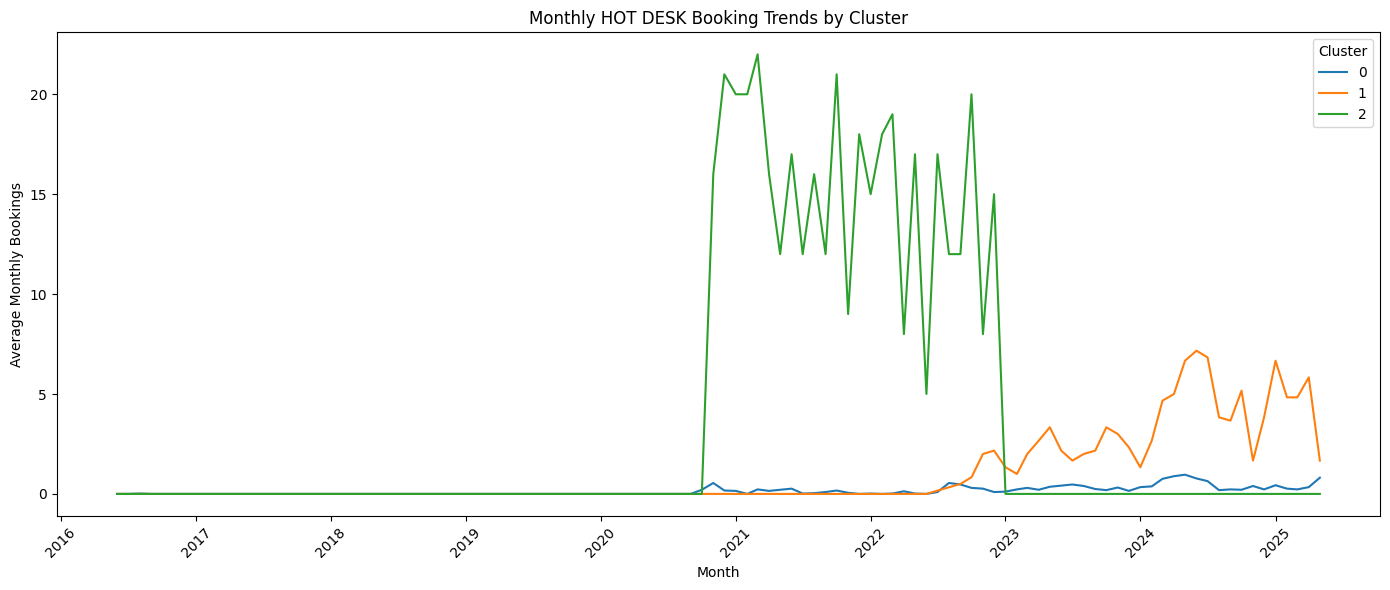

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# pivot data longer for easier plotting
melted = HD_clustered_rates.reset_index().melt(
    id_vars=['BookableUnit_Id', 'Cluster'],
    value_vars=MR.columns,
    var_name='Month',
    value_name='Monthly_Bookings'
)

# Convert Month from Period to datetime
melted['Month'] = melted['Month'].astype(str)
melted['Month'] = pd.to_datetime(melted['Month'])

# Plot: average monthly bookings per cluster
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=melted,
    x='Month',
    y='Monthly_Bookings',
    hue='Cluster',
    estimator='mean',
    ci=None,
    palette='tab10'
)
plt.title('Monthly HOT DESK Booking Trends by Cluster')
plt.xlabel('Month')
plt.ylabel('Average Monthly Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1728915011.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


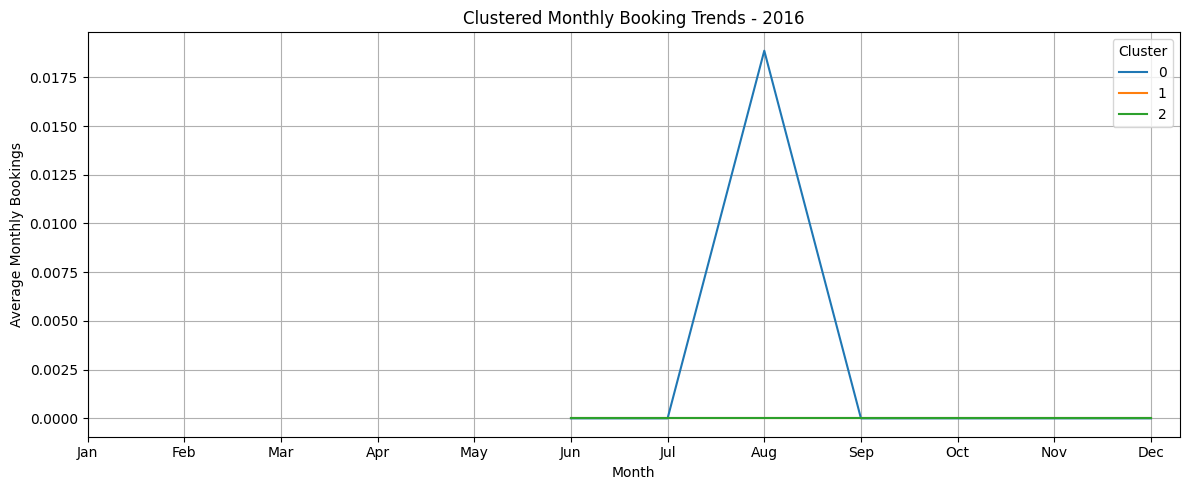

/tmp/ipython-input-1728915011.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


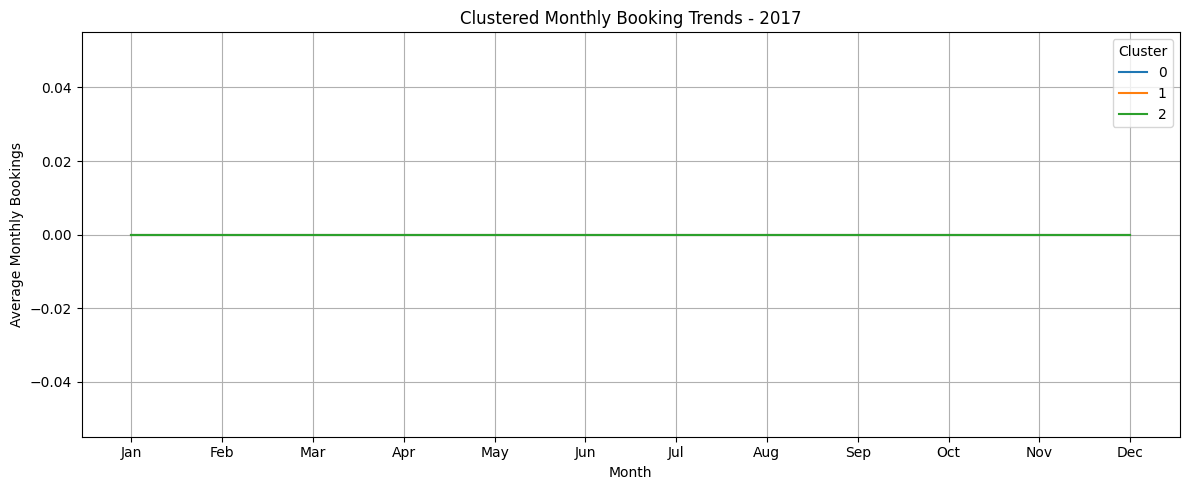

/tmp/ipython-input-1728915011.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


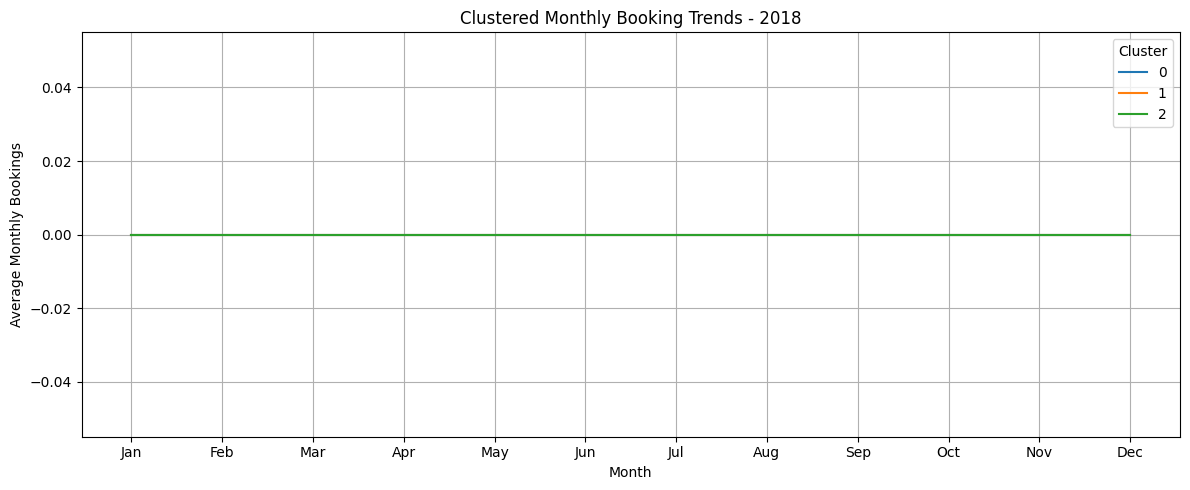

/tmp/ipython-input-1728915011.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


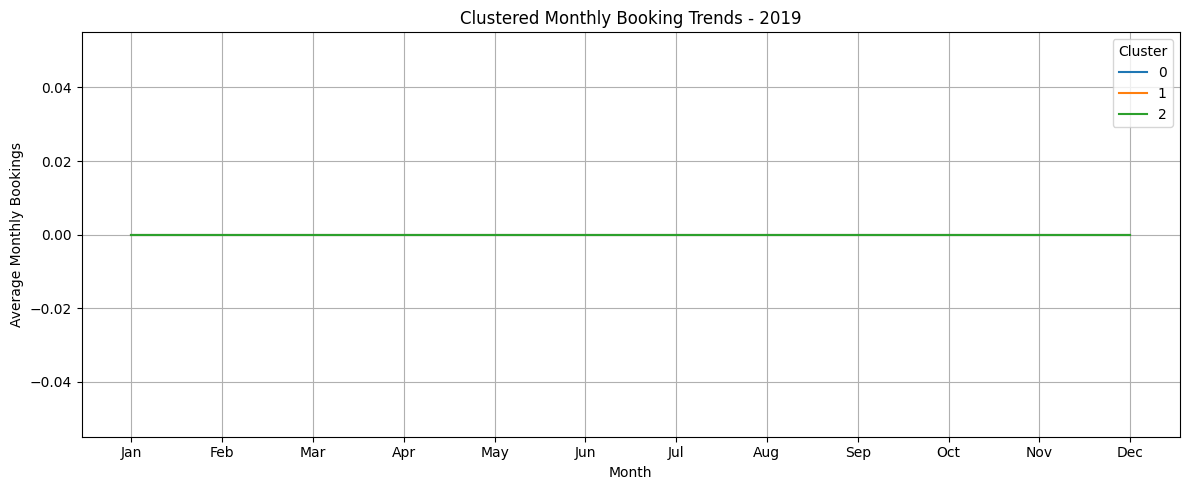

/tmp/ipython-input-1728915011.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


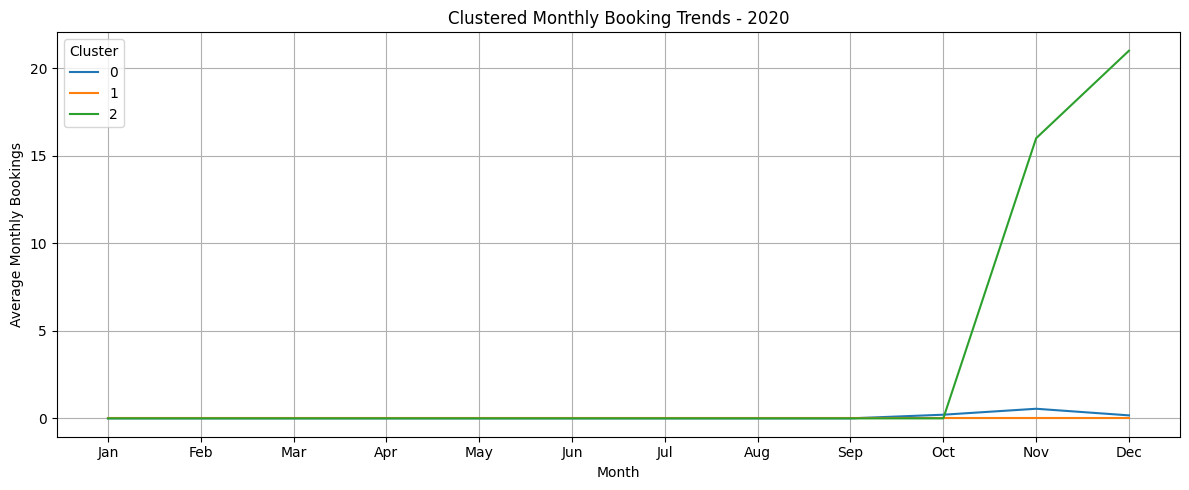

/tmp/ipython-input-1728915011.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


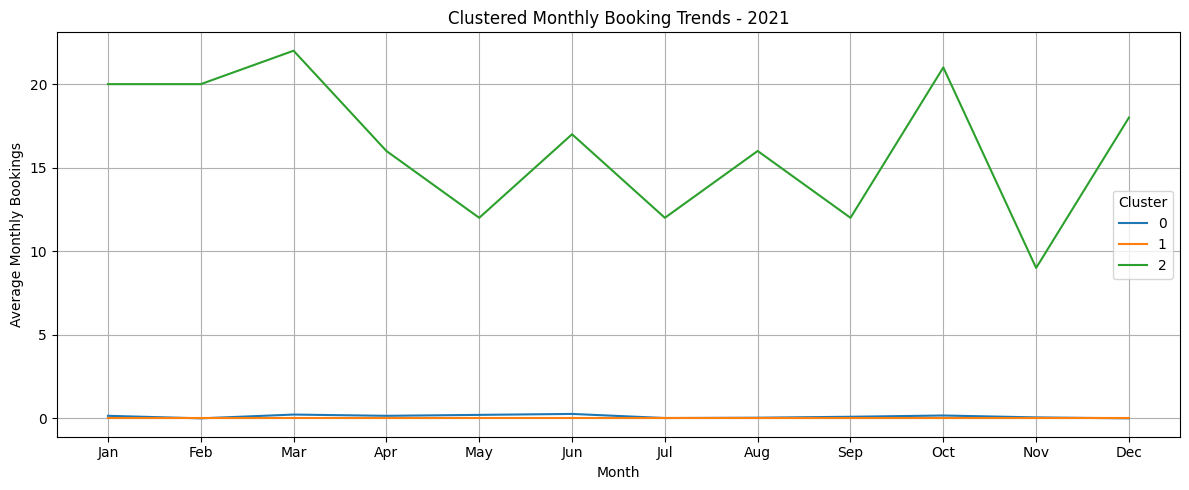

/tmp/ipython-input-1728915011.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


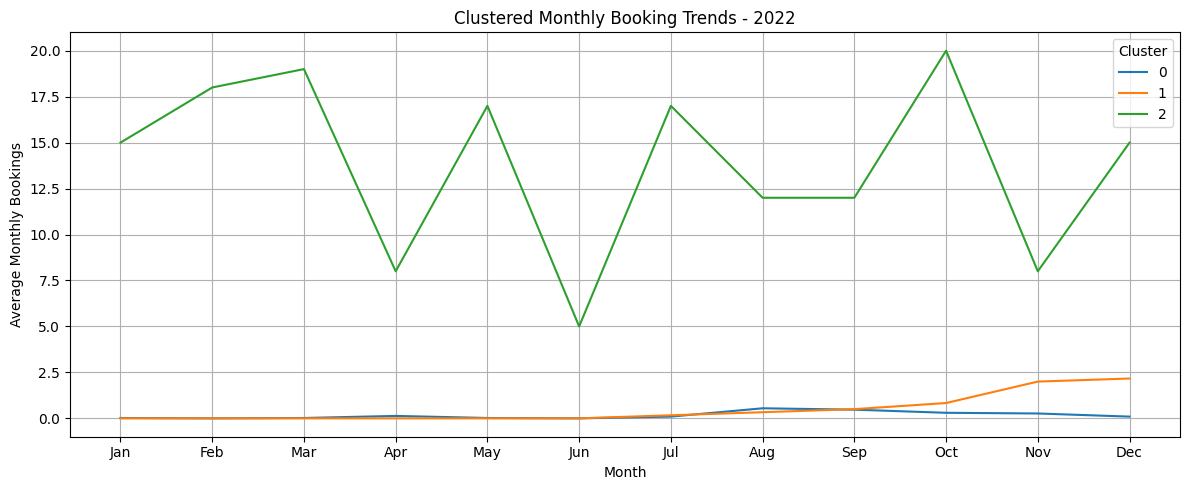

/tmp/ipython-input-1728915011.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


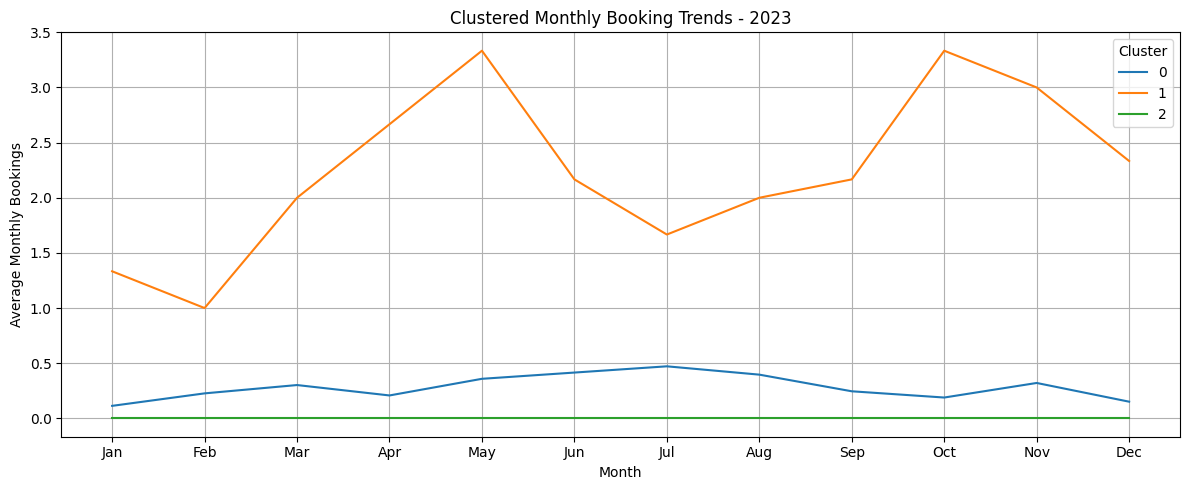

/tmp/ipython-input-1728915011.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


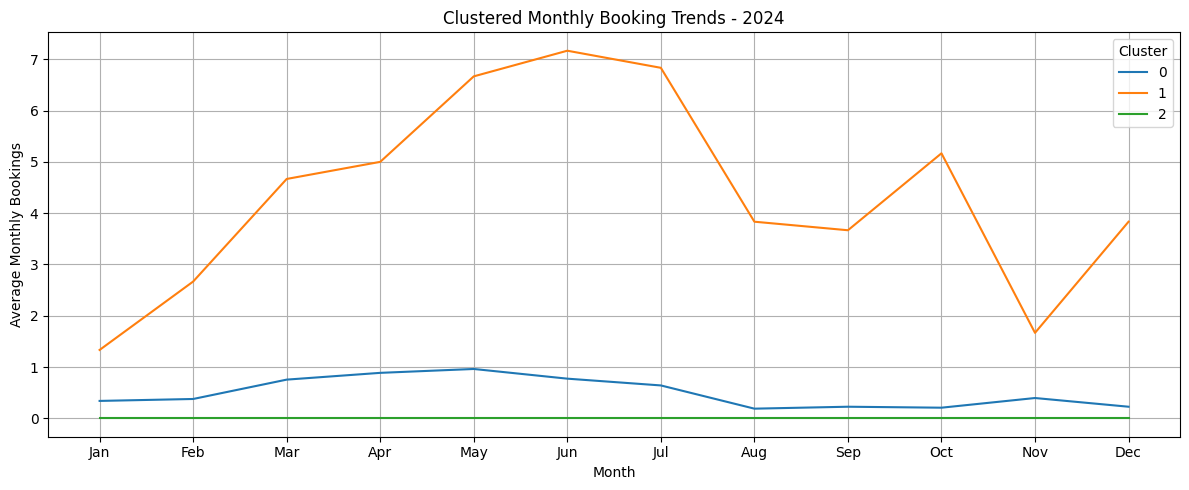

/tmp/ipython-input-1728915011.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


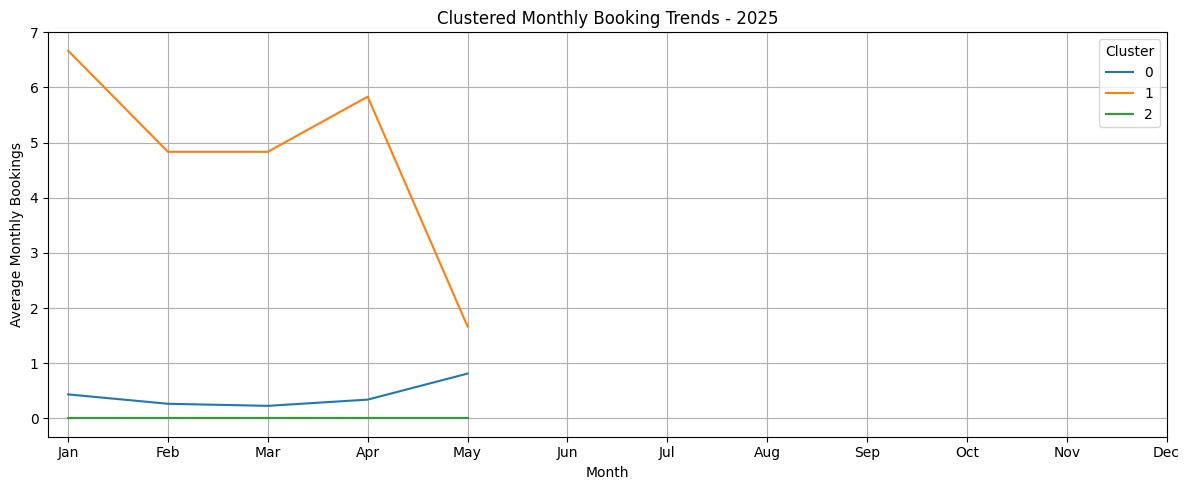

In [ ]:

# Convert Period to datetime
melted['Year'] = melted['Month'].dt.year
melted['Month_Num'] = melted['Month'].dt.month

# 2. Define plot function for each year
def plot_by_year(year):
    plt.figure(figsize=(12, 5))
    yearly_data = melted[melted['Year'] == year]

    sns.lineplot(
        data=yearly_data,
        x='Month_Num',
        y='Monthly_Bookings',
        hue='Cluster',
        estimator='mean',
        ci=None,
        palette='tab10'
    )
    plt.title(f'Clustered Monthly Booking Trends - {year}')
    plt.xlabel('Month')
    plt.ylabel('Average Monthly Bookings')
    plt.xticks(range(1, 13), [
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ])
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 3. Loop through each year in the dataset
years = melted['Year'].unique()
for yr in sorted(years):
    plot_by_year(yr)


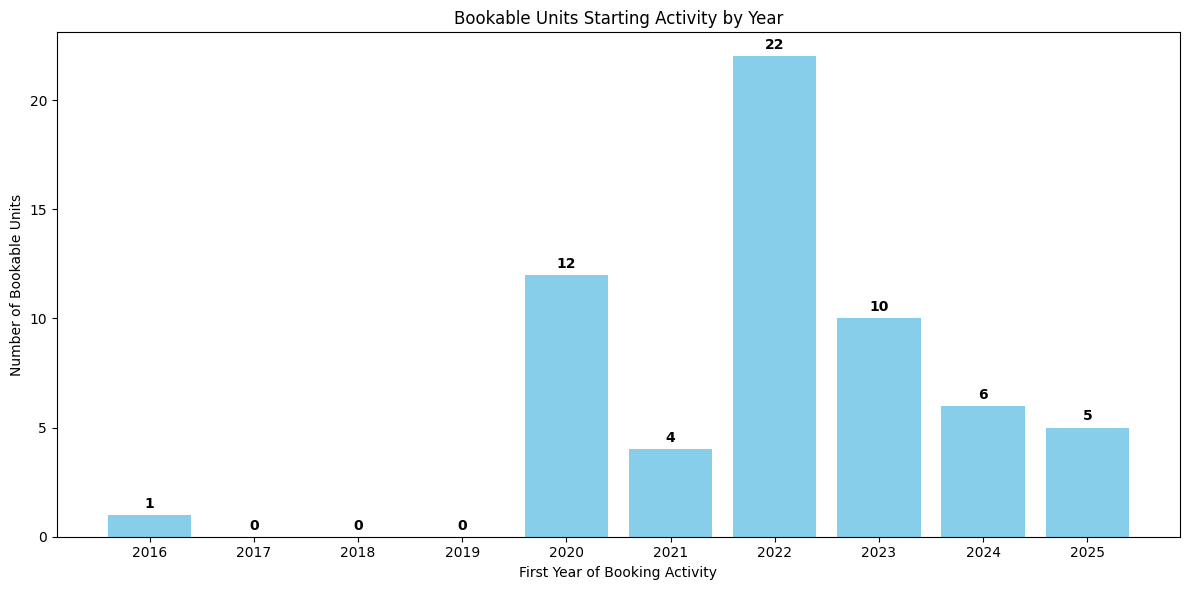

In [ ]:
# 1. Detect time-series columns by name pattern (YYYY-MM format starting with '20')
ts_col_names = [col for col in HDcluStage1_df.columns if str(col).startswith("20")]

# 2. Convert to Period (monthly) for year extraction
periods = [pd.Period(col, freq='M') for col in ts_col_names]

# 3. Map Period -> original column name for easy lookup
period_to_col = dict(zip(periods, ts_col_names))

# 4. Find the first booking year for each unit
first_booking_years = []
for idx, row in HDcluStage1_df.iterrows():
    booked_periods = [p for p in periods if row[period_to_col[p]] > 0]
    if booked_periods:
        first_year = min(p.year for p in booked_periods)
        first_booking_years.append(first_year)
    else:
        first_booking_years.append(None)

# 5. Add to DataFrame
HDcluStage1_df['First_Booking_Year'] = first_booking_years

# 6. Count per year (fill missing years with 0)
years_range = list(range(2016, 2026))  # up to 2025 inclusive
clu_start_counts = (
    HDcluStage1_df['First_Booking_Year']
    .value_counts()
    .reindex(years_range, fill_value=0)
)

# 7. Plot with counts
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(clu_start_counts.index, clu_start_counts.values, color='skyblue')

ax.set_xlabel("First Year of Booking Activity")
ax.set_ylabel("Number of Bookable Units")
ax.set_title("Bookable Units Starting Activity by Year")
ax.set_xticks(years_range)

# Add count labels on each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(
        str(int(height)),
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=10, fontweight='bold'
    )

plt.tight_layout()
plt.show()


In [ ]:
HDcluStage1_df[HDcluStage1_df['First_Booking_Year'] == 2020]

,BookableUnit_Id,BookableUnit_Name,Building_Name,District_Title,Equipment_Title,BookableUnit_Capacity,BookableUnitType_Title,2016-06,2016-07,2016-08,...,2024-12,2025-01,2025-02,2025-03,2025-04,2025-05,Active_Months,Total_Bookings,Cluster,First_Booking_Year
1,338,Sppt 324 Kvac 1-338,Raoxqgobq Pjirambx-19,Hnfpuyplq-4,Unknown,1.0,Hot Desk,0,0,0,...,0,0,0,0,0,0,9,26,0,2020
2,341,Sppt 320 Kvac 09-341,Raoxqgobq Pjirambx-19,Hnfpuyplq-4,Unknown,1.0,Hot Desk,0,0,0,...,0,0,0,0,0,0,1,4,0,2020
3,332,Sppt 324 Kvac 4-332,Raoxqgobq Pjirambx-19,Hnfpuyplq-4,Unknown,1.0,Hot Desk,0,0,0,...,0,0,0,0,0,0,8,23,0,2020
4,340,Sppt 320 Kvac 08-340,Raoxqgobq Pjirambx-19,Hnfpuyplq-4,Unknown,1.0,Hot Desk,0,0,0,...,0,0,0,0,0,0,1,2,0,2020
5,344,Sppt 320 Kvac 04-344,Raoxqgobq Pjirambx-19,Hnfpuyplq-4,Unknown,1.0,Hot Desk,0,0,0,...,0,0,0,0,0,0,3,3,0,2020
6,339,Sppt 320 Kvac 11-339,Raoxqgobq Pjirambx-19,Hnfpuyplq-4,Unknown,1.0,Hot Desk,0,0,0,...,0,0,0,0,0,0,2,5,0,2020
7,334,Sppt 324 Kvac 6-334,Raoxqgobq Pjirambx-19,Hnfpuyplq-4,Unknown,1.0,Hot Desk,0,0,0,...,0,0,0,0,0,0,5,13,0,2020
8,346,Sppt 314 Kvac 1-346,Raoxqgobq Pjirambx-19,Hnfpuyplq-4,Unknown,1.0,Hot Desk,0,0,0,...,0,0,0,0,0,0,26,398,2,2020
9,311,Chtls Bjjlev Kvac 1-311,Iopqybn Pjirambx-7,Nngvhlpt-5,Unknown,1.0,Hot Desk,0,0,0,...,0,0,0,0,0,0,3,3,0,2020
10,335,Sppt 324 Kvac 5-335,Raoxqgobq Pjirambx-19,Hnfpuyplq-4,Unknown,1.0,Hot Desk,0,0,0,...,0,0,0,0,0,0,12,31,0,2020


In [ ]:

quartile_labels = ['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)']

# Create quartile column with meaningful labels
HDcluStage1_df['Booking_Quartile'] = pd.qcut(
    HDcluStage1_df['Total_Bookings'], q=4, labels=quartile_labels
)

# Preview
HDcluStage1_df[['Total_Bookings', 'Booking_Quartile']].head()


,Total_Bookings,Booking_Quartile
0,1,Q1 (Lowest)
1,26,Q3
2,4,Q2
3,23,Q3
4,2,Q1 (Lowest)


/tmp/ipython-input-3472905057.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


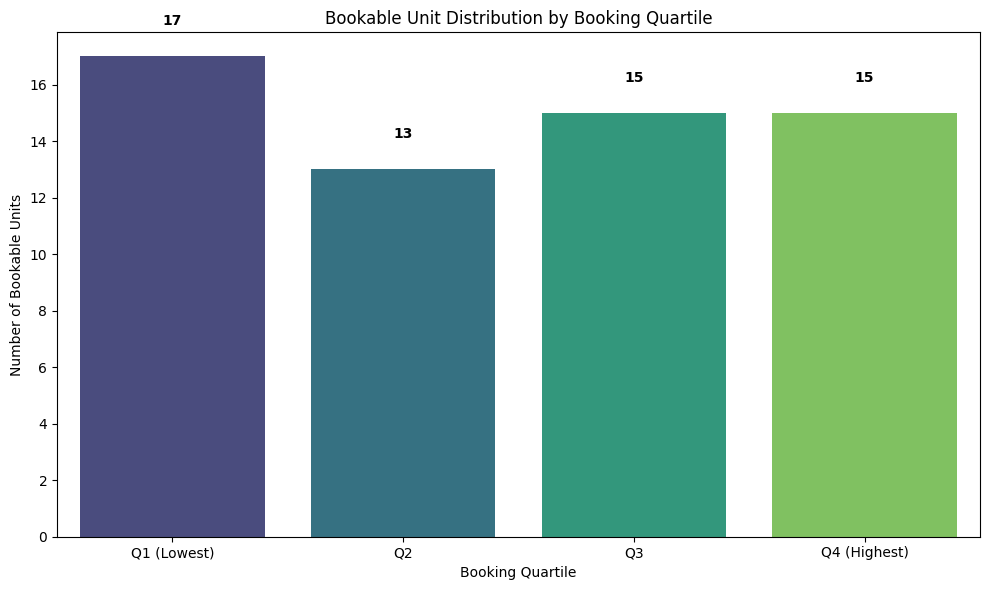

In [ ]:
# Count of bookable units in each quartile
quartile_dist = HDcluStage1_df['Booking_Quartile'].value_counts().reindex(quartile_labels)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=quartile_dist.index,
    y=quartile_dist.values,
    palette='viridis'
)

# Add value labels on bars
for i, v in enumerate(quartile_dist.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

plt.title('Bookable Unit Distribution by Booking Quartile')
plt.xlabel('Booking Quartile')
plt.ylabel('Number of Bookable Units')
plt.tight_layout()
plt.show()




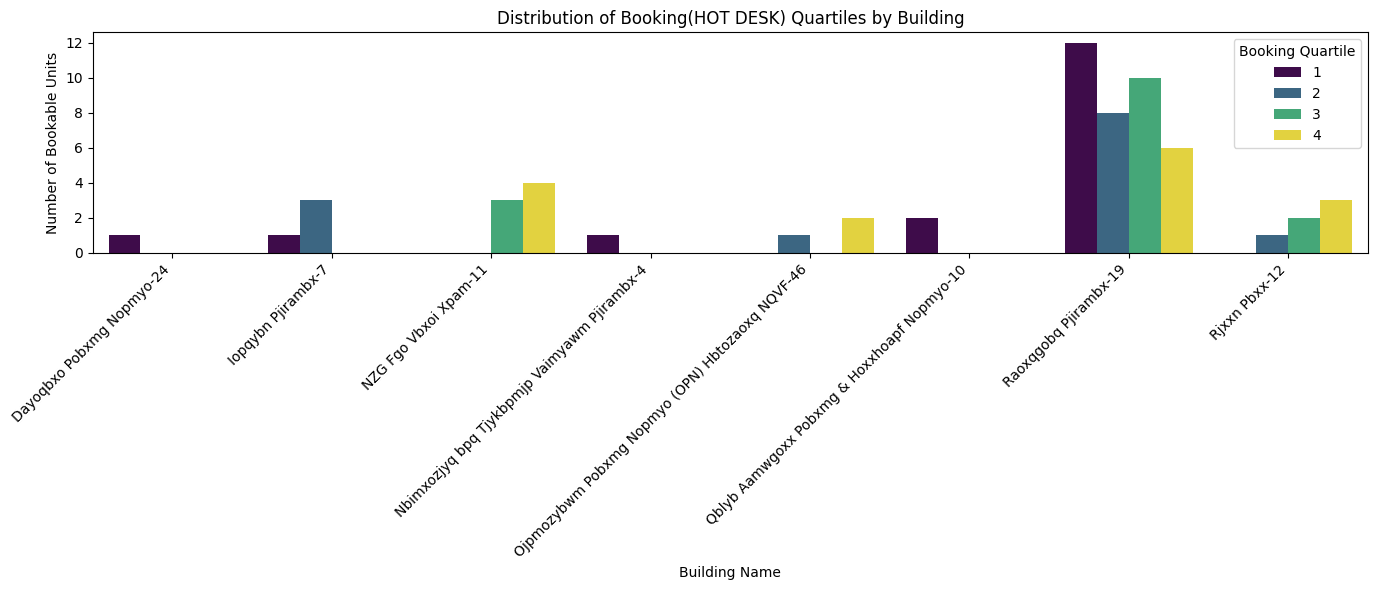

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Booking_Quartile is present and numeric
HDcluStage1_df['Booking_Quartile'] = pd.qcut(
    HDcluStage1_df['Total_Bookings'], q=4, labels=[1, 2, 3, 4]
).astype(int)

# Count of bookable units per Building and Quartile
quartile_counts = HDcluStage1_df.groupby(['Building_Name', 'Booking_Quartile']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=quartile_counts,
    x='Building_Name',
    y='Count',
    hue='Booking_Quartile',
    palette='viridis'
)

plt.title('Distribution of Booking(HOT DESK) Quartiles by Building')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Building Name')
plt.ylabel('Number of Bookable Units')
plt.legend(title='Booking Quartile')
plt.tight_layout()
plt.show()


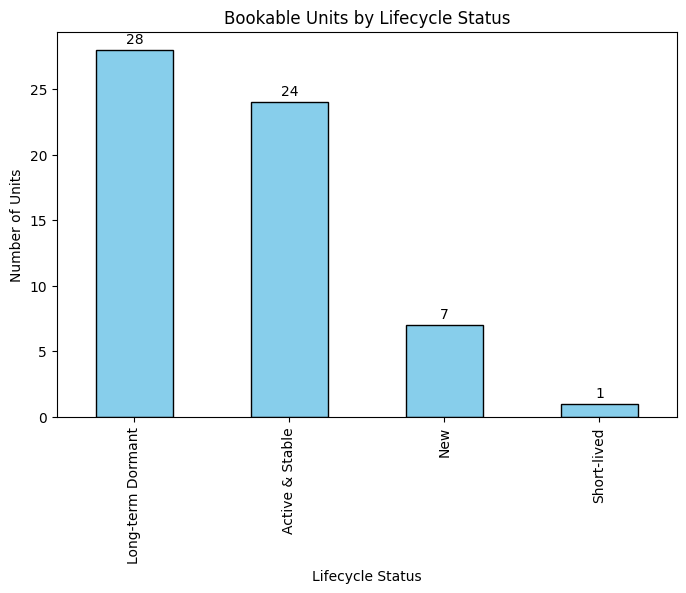

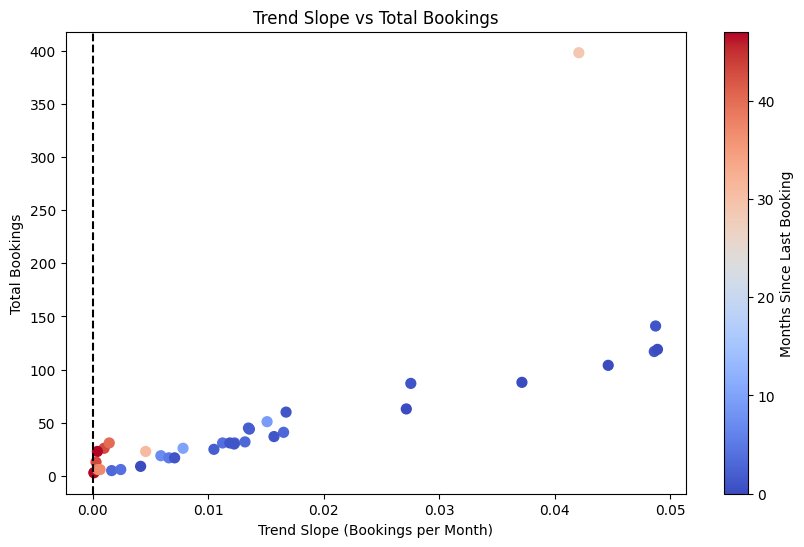

Deprecate list shape: (29, 22)
Review list shape: (0, 22)
Keep list shape: (31, 22)


In [ ]:

from sklearn.linear_model import LinearRegression
# ---------------------------
# Step 1: Reset index so ID becomes a column
# ---------------------------
df = HDcluStage1_df.reset_index()

# ---------------------------
# Step 2: Identify monthly booking columns (YYYY-MM format)
# ---------------------------
monthly_cols = [col for col in df.columns if str(col).startswith(('20')) and '-' in str(col)]

# Meta (non-monthly) columns
lc_meta_cols = [c for c in df.columns if c not in monthly_cols]

# ---------------------------
# Step 3: Melt to long format
# ---------------------------
df_long = df.melt(
    id_vars=[col for col in df.columns if col not in monthly_cols],
    value_vars=monthly_cols,
    var_name='month',
    value_name='bookings'
)


# Convert month to datetime
df_long["month"] = pd.to_datetime(df_long["month"], format="%Y-%m", errors="coerce")

# ---- STEP 2: Usage stats per BookableUnit_Id ----
usage_stats = df_long.groupby("BookableUnit_Id").agg(
    first_booking=("month", lambda x: x[df_long.loc[x.index, "bookings"] > 0].min()),
    last_booking=("month", lambda x: x[df_long.loc[x.index, "bookings"] > 0].max()),
    total_bookings=("bookings", "sum"),
    active_months=("bookings", lambda x: (x > 0).sum())
).reset_index()

today = pd.Timestamp.today()
fixed_period = pd.Period('2025-05', freq='M')

# ---- STEP 2.1: Months since last booking ----
def months_since_last_fn(last_date):
    if pd.isna(last_date):
        return np.nan
    #return (today.to_period("M") - last_date.to_period("M")).n
    diff = fixed_period - last_date.to_period("M")
    return diff.n





def usage_duration_fn(first_date, last_date):
    if pd.isna(first_date) or pd.isna(last_date):
        return np.nan
    return (last_date.to_period("M") - first_date.to_period("M")).n + 1

usage_stats["months_since_last"] = usage_stats["last_booking"].apply(months_since_last_fn)
usage_stats["usage_duration_months"] = usage_stats.apply(
    lambda row: usage_duration_fn(row["first_booking"], row["last_booking"]),
    axis=1
)


def safe_usage_duration(first_date, last_date):
    if pd.isna(first_date) or pd.isna(last_date):
        return np.nan
    return (last_date.to_period("M") - first_date.to_period("M")).n + 1

usage_stats["usage_duration_months"] = usage_stats.apply(
    lambda row: safe_usage_duration(row["first_booking"], row["last_booking"]),
    axis=1
)


# ---- STEP 3: Trend Analysis ----
trend_results = []
for unit_id, group in df_long.groupby("BookableUnit_Id"):
    group = group.sort_values("month")
    y = group["bookings"].values
    X = np.arange(len(group)).reshape(-1, 1)
    if np.count_nonzero(y) >= 3:  # Enough data points
        model = LinearRegression().fit(X, y)
        slope = model.coef_[0]
    else:
        slope = np.nan
    trend_results.append({"BookableUnit_Id": unit_id, "slope": slope})

trend_df = pd.DataFrame(trend_results)
usage_stats = usage_stats.merge(trend_df, on="BookableUnit_Id", how="left")

# ---- STEP 4: Lifecycle Classification ----
conditions = [
    (usage_stats["months_since_last"] > 24),  # Long-term Dormant
    (usage_stats["usage_duration_months"] < 12) & (usage_stats["months_since_last"] > 12),  # Short-lived
    (usage_stats["months_since_last"] > 12),  # Dormant
    (usage_stats["usage_duration_months"] <= 12) & (usage_stats["months_since_last"] <= 12),  # New
    (usage_stats["slope"] < -0.5),  # Declining
    (usage_stats["slope"] > 0.5),  # Increasing
    (usage_stats["slope"].between(-0.5, 0.5))  # Stable
]

choices = [
    "Long-term Dormant",
    "Short-lived",
    "Dormant",
    "New",
    "Declining",
    "Active & Increasing",
    "Active & Stable"
]

usage_stats["lifecycle_status"] = np.select(conditions, choices, default="Review Needed")

# ---- STEP 5: Deprecation Decision ----
usage_stats["deprecation_decision"] = usage_stats["lifecycle_status"].map({
    "Long-term Dormant": "Deprecate",
    "Short-lived": "Deprecate",
    "Dormant": "Review",
    "Declining": "Review",
    "New": "Keep",
    "Active & Increasing": "Keep",
    "Active & Stable": "Keep",
    "Review Needed": "Review"
})

# ---- STEP 6: Merge back to metadata ----
final_lifecycle_df = df[lc_meta_cols].drop_duplicates().merge(
    usage_stats, on="BookableUnit_Id", how="left"
)

# ---- STEP 7: Visualisations ----
plt.figure(figsize=(8, 5))
final_lifecycle_df["lifecycle_status"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Bookable Units by Lifecycle Status")
plt.xlabel("Lifecycle Status")
plt.ylabel("Number of Units")
for i, val in enumerate(final_lifecycle_df["lifecycle_status"].value_counts()):
    plt.text(i, val + 0.5, str(val), ha="center")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(final_lifecycle_df["slope"], final_lifecycle_df["total_bookings"],
            c=final_lifecycle_df["months_since_last"], cmap="coolwarm", s=50)
plt.axvline(0, color="black", linestyle="--")
plt.colorbar(label="Months Since Last Booking")
plt.xlabel("Trend Slope (Bookings per Month)")
plt.ylabel("Total Bookings")
plt.title("Trend Slope vs Total Bookings")
plt.show()

# ---- STEP 8: Output lists ----
deprecation_list = final_lifecycle_df[final_lifecycle_df["deprecation_decision"] == "Deprecate"]
review_list = final_lifecycle_df[final_lifecycle_df["deprecation_decision"] == "Review"]
keep_list = final_lifecycle_df[final_lifecycle_df["deprecation_decision"] == "Keep"]

print("Deprecate list shape:", deprecation_list.shape)
print("Review list shape:", review_list.shape)
print("Keep list shape:", keep_list.shape)


In [ ]:
# Select only the columns needed for the join
df_subset = df[["BookableUnit_Id", "Cluster", "Booking_Quartile","BookableUnit_Name",	"Building_Name","District_Title"]]

# Inner join on BookableUnit_Id
usage_stats_joined = usage_stats.merge(
    df_subset,
    on="BookableUnit_Id",
    how="inner"
)

# Optional: set index back
#usage_stats_joined = usage_stats_joined.set_index("BookableUnit_Id")


In [ ]:
usage_stats_joined['Cluster_name'] = usage_stats_joined['Cluster'].map({
    0: 'LOw-0',
    1: 'Middle-1',
    2: 'High-2'

})

In [ ]:
usage_stats_joined['Quartile_name'] = usage_stats_joined['Booking_Quartile'].map({
    1: "Q1 (Lowest 25%)",
    2: "Q2 (25%–49%)",
    3: "Q3 (50%–74%)",
    4: "Q4 (Top 25%)"
})

In [ ]:
usage_stats_joined.head()

,BookableUnit_Id,first_booking,last_booking,total_bookings,active_months,months_since_last,usage_duration_months,slope,lifecycle_status,deprecation_decision,Cluster,Booking_Quartile,BookableUnit_Name,Building_Name,District_Title,Cluster_name,Quartile_name
0,19,2016-08-01,2016-08-01,1,1,105,1,NaN,Long-term Dormant,Deprecate,0,1,Qpw Kvac 1-19,Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4,Y hkgzlkh-3,LOw-0,Q1 (Lowest 25%)
1,311,2020-11-01,2021-06-01,3,3,47,8,0.000110,Long-term Dormant,Deprecate,0,2,Chtls Bjjlev Kvac 1-311,Iopqybn Pjirambx-7,Nngvhlpt-5,LOw-0,Q2 (25%–49%)
2,312,2021-05-01,2021-06-01,3,2,47,2,NaN,Long-term Dormant,Deprecate,0,2,Chtls Bjjlev Kvac 2-312,Iopqybn Pjirambx-7,Nngvhlpt-5,LOw-0,Q2 (25%–49%)
3,332,2020-10-01,2021-06-01,23,8,47,9,0.000414,Long-term Dormant,Deprecate,0,3,Sppt 324 Kvac 4-332,Raoxqgobq Pjirambx-19,Hnfpuyplq-4,LOw-0,Q3 (50%–74%)
4,334,2020-11-01,2021-10-01,13,5,43,12,0.000300,Long-term Dormant,Deprecate,0,2,Sppt 324 Kvac 6-334,Raoxqgobq Pjirambx-19,Hnfpuyplq-4,LOw-0,Q2 (25%–49%)


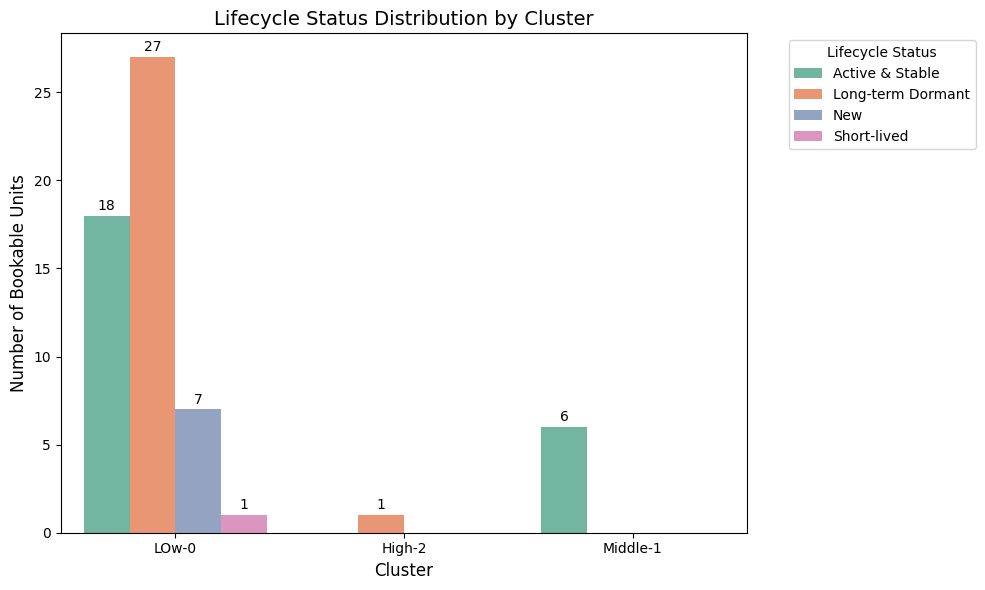

In [ ]:


# Ensure lifecycle_status is categorical
usage_stats_joined["lifecycle_status"] = usage_stats_joined["lifecycle_status"].astype("category")

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=usage_stats_joined.reset_index(),
    x="Cluster_name",
    hue="lifecycle_status",
    palette="Set2"
)

# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=2)

plt.title("Lifecycle Status Distribution by Cluster", fontsize=14)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Number of Bookable Units", fontsize=12)
plt.legend(title="Lifecycle Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


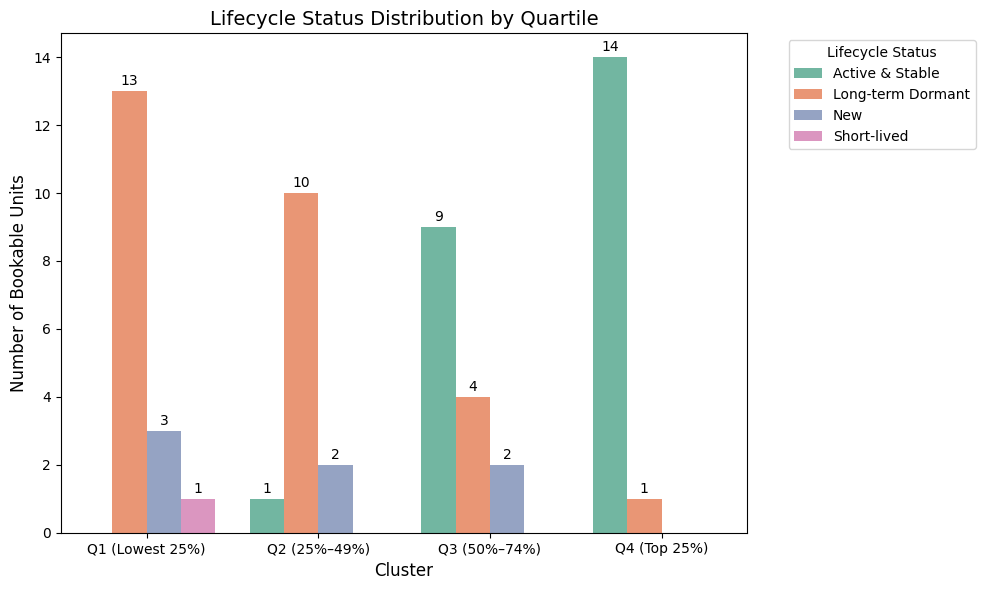

In [ ]:

# Ensure lifecycle_status is categorical
usage_stats_joined["lifecycle_status"] = usage_stats_joined["lifecycle_status"].astype("category")

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=usage_stats_joined.reset_index(),
    x="Quartile_name",
    hue="lifecycle_status",
    palette="Set2"
)

# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=2)

plt.title("Lifecycle Status Distribution by Quartile", fontsize=14)
plt.xlabel("Quartile", fontsize=12)
plt.ylabel("Number of Bookable Units", fontsize=12)
plt.legend(title="Lifecycle Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


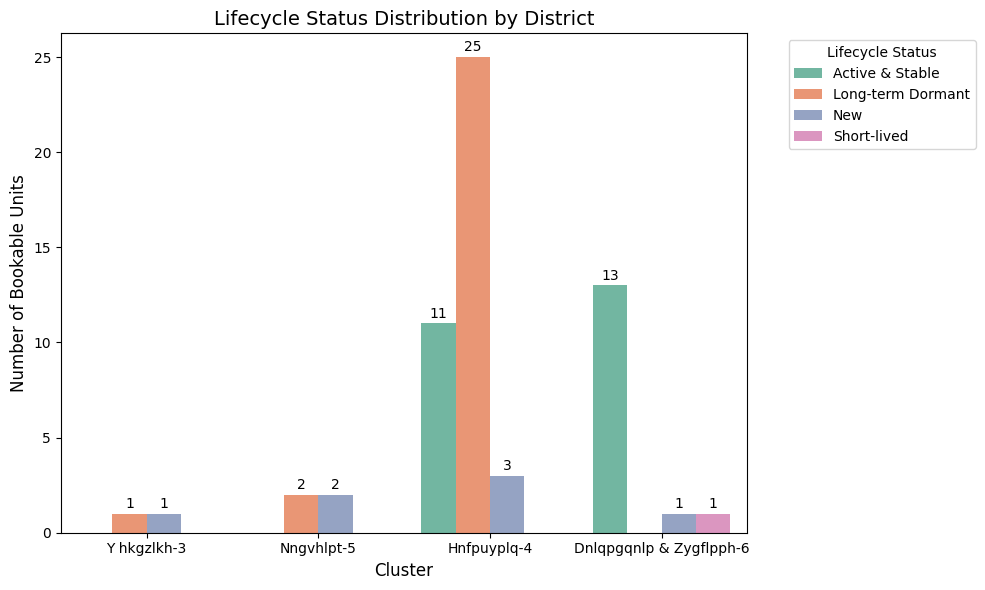

In [ ]:
# Ensure lifecycle_status is categorical
#usage_stats_joined["lifecycle_status"] = usage_stats_joined["lifecycle_status"].astype("category")

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=usage_stats_joined.reset_index(),
    x="District_Title",
    hue="lifecycle_status",
    palette="Set2"
)

# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=2)

plt.title("Lifecycle Status Distribution by District", fontsize=14)
plt.xlabel("District", fontsize=12)
plt.ylabel("Number of Bookable Units", fontsize=12)
plt.legend(title="Lifecycle Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
HD_act_sta_df = usage_stats_joined[usage_stats_joined["lifecycle_status"] == "Active & Stable"]
HD_short_df = usage_stats_joined[usage_stats_joined["lifecycle_status"] == "Short-lived"]
HD_lt_dorm_df = usage_stats_joined[usage_stats_joined["lifecycle_status"] == "Long-term Dormant"]
HD_new_df = usage_stats_joined[usage_stats_joined["lifecycle_status"] == "New"]

In [ ]:
usage_stats_joined.to_csv('HDusage_stats_joined.csv', index=False)
#HD_act_sta_df.to_csv('HD_act_sta_df.csv', index=False)
#HD_short_df.to_csv('HD_short_df.csv', index=False)
#HD_lt_dorm_df.to_csv('HD_lt_dorm_df.csv', index=False)
#HD_new_df.to_csv('HD_new_df.csv', index=False)